# Кластерный анализ

**Кластерный анализ** — метод группировки наблюдений в кластеры таким образом, что объекты внутри одного кластера подобны друг другу, а между кластерами имеют существенные различия. Помогает идентифицировать и сегментировать группы в данных, например, при анализе клиентской базы.

### Реализация

Glioblastoma — это агрессивная форма рака мозга. METTL7B — это ген, который может играть важную роль в регуляции эпигенетических изменений, влияющих на спецификацию клеточных линий при этом типе рака.

Цель кластерного анализа в данном случае:
1. **Идентификация подтипов клеток:** Определить различные подтипы клеток в образцах глиобластомы на основе экспрессии генов.
2. **Анализ паттернов экспрессии:** Обнаружить паттерны экспрессии генов, ассоциированные с различными биологическими процессами или состояниями клеток.
3. **Выявление потенциальных биомаркеров:** Найти гены, которые могут служить биомаркерами для различных подтипов раковых клеток или этапов развития опухоли.

In [1]:
!pip install numpy pandas seaborn scipy scikit-learn matplotlib --quiet


[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from matplotlib.ticker import MaxNLocator

In [3]:
# Загрузка данных
file_path = '../datasets/GSE242328_GIC19_log2RPKM_annot.csv'
data = pd.read_csv(file_path)

In [4]:
# Исключение нечисловых столбцов (предположим, первый столбец содержит имена генов)
gene_expression_data = data.iloc[:, 2:]

# Просмотр очищенных данных, чтобы убедиться, что остались только числовые значения
print(gene_expression_data.head())

   G19.Scr.1  G19.Scr.2  G19.Scr.3  G19.Scr.4  G19.shMETTL7B.1   
0   5.418103   5.380610   4.926321   4.922284         4.969494  \
1   5.110714   5.058295   5.023400   5.061107         4.855226   
2   3.142749   2.926525   3.493629   3.274455         3.323401   
3   3.582025   3.898739   4.064021   3.886876         4.007363   
4   6.807769   6.763962   6.775450   6.896957         6.866082   

   G19.shMETTL7B.2  G19.shMETTL7B.3  G19.shMETTL7B.4  
0         4.907265         4.951280         5.038906  
1         4.856354         4.909074         4.843968  
2         3.525981         3.262855         3.427492  
3         4.144121         4.175417         3.952343  
4         6.855876         6.862137         6.814518  


In [5]:
# Стандартизация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(gene_expression_data)

In [6]:
# Понижение размерности с помощью PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

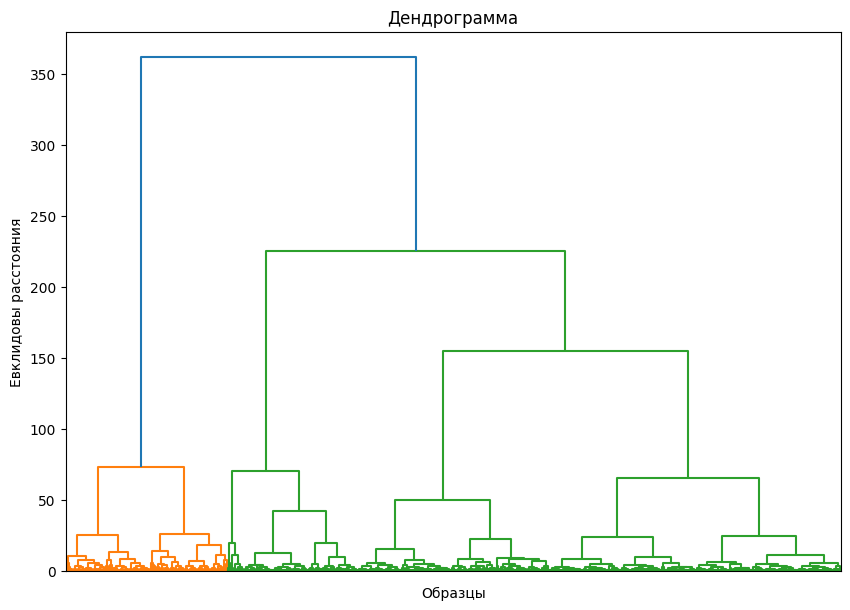

In [7]:
# Генерация связанной матрицы
Z = linkage(pca_data, method='ward')

# Рисование дендрограммы
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Дендрограмма')
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True, prune='both', nbins=30))
plt.xlabel('Образцы')
plt.ylabel('Евклидовы расстояния')
plt.show()

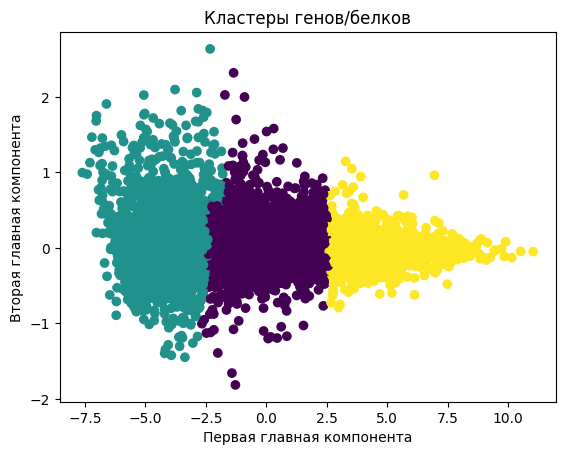

In [8]:
# Проводим кластеризацию на, например, 3 кластера
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
clusters = cluster.fit_predict(pca_data)

# Добавим метки кластеров к исходным данным
data['Cluster'] = clusters

# Визуализация кластеров
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data['Cluster'], cmap='viridis')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.title('Кластеры генов/белков')
plt.show()

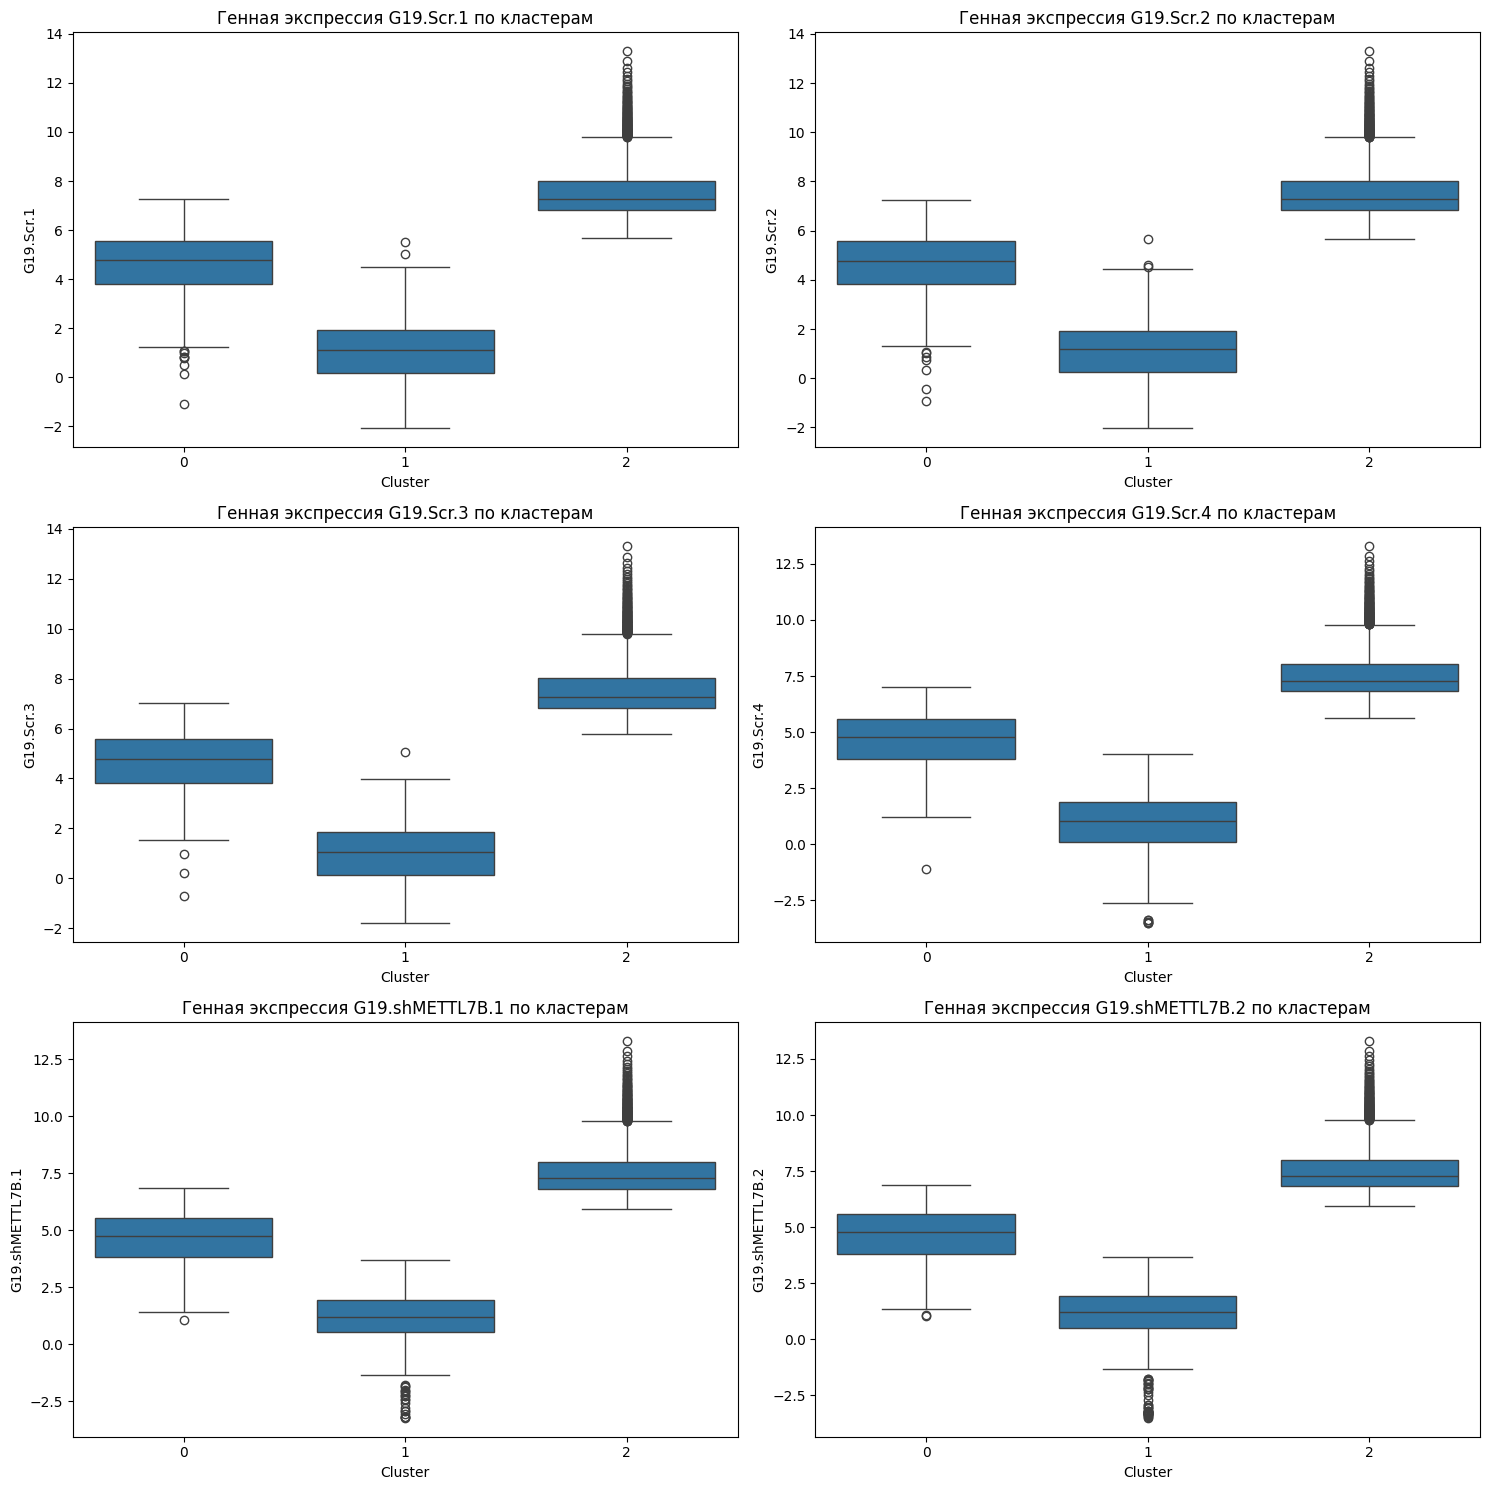

In [9]:
genes_to_plot = gene_expression_data.columns[:6]  # Выбор первых 5 генов для визуализации

# Создание подграфиков
fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # Создание сетки 3x2 (6 графиков)
axes = axes.flatten()  # Разворачиваем массив подграфиков

for i, gene in enumerate(genes_to_plot):
    sns.boxplot(x='Cluster', y=gene, data=data, ax=axes[i])
    axes[i].set_title(f'Генная экспрессия {gene} по кластерам')

# Оставшиеся подграфики, если их больше, чем генов, будут пустыми
for j in range(len(genes_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

После кластеризации наши данные разбиваются на несколько групп. У нас получилось три кластера. Каждый кластер может быть интерпретирован следующим образом:

1. **Кластер 1:**
   - **Профиль экспрессии:** Этот кластер может содержать клетки с высоким уровнем экспрессии определенных генов, ассоциированных с одним типом клеток или стадией дифференцировки.
   - **Интерпретация:** Возможно, это группа клеток, которые находятся в определенном состоянии или имеют определенный тип дифференцировки в глиобластоме.

2. **Кластер 2:**
   - **Профиль экспрессии:** В этом кластере могут быть клетки с отличным от первого кластера паттерном экспрессии генов.
   - **Интерпретация:** Эти клетки могут представлять другой подтип или состояние клеток.

3. **Кластер 3:**
   - **Профиль экспрессии:** Этот кластер может содержать клетки с еще одним уникальным профилем экспрессии.
   - **Интерпретация:** Это может быть группа клеток, которые реагируют на определенные сигналы или имеют уникальные эпигенетические изменения.

#### Подтверждение гипотез с биологической точки зрения
- **Функциональная аннотация:** Используем базы данных, такие как Gene Ontology или KEGG Pathways, чтобы понять, какие биологические процессы или пути активированы в каждом кластере.
- **Сравнение с клиническими данными:** Если доступны клинические данные, можно сравнить кластеры с различными клиническими характеристиками пациентов, чтобы понять, как эти кластеры могут быть связаны с прогнозом или терапевтическим ответом.

### Заключение
Кластерный анализ позволяет разделить данные на группы с похожими характеристиками, что помогает улучшить понимание биологии изучаемого объекта. В данном исследовании кластерный анализ может помочь выявить подтипы клеток глиобластомы и понять их роли в прогрессировании заболевания. 